<ipython-input-1-9e13ae0db4ce>:13: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.arange(0,np.size(iq)),20*np.log10(np.abs(iq)))


MemoryError: Unable to allocate 763. MiB for an array with shape (49999999, 2) and data type float64

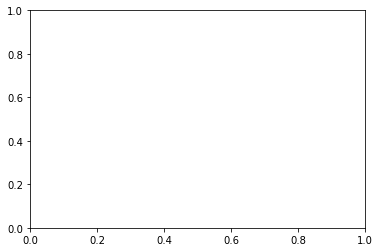

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

analogToVolts = 5.0/1023.0;
samplesToSave = 50000000;
sliceLower = 0
sliceUpper = samplesToSave - 1
fparray = np.memmap('iq.dat',dtype='float32',mode='r',shape=(samplesToSave,2))
iq = analogToVolts*(fparray[sliceLower:sliceUpper,0]+1j*fparray[sliceLower:sliceUpper,1])

fig = plt.figure()
ax = plt.axes()
ax.plot(np.arange(0,np.size(iq)),20*np.log10(np.abs(iq)))

In [ ]:
Fiq = np.fft.fft(iq)
#In Fourier space, can quickly and easily filter out a bunch of artifacts. But is highly dependent on context!
# Would need to do various experiments or create some write-ups that classify these.
babyfilter = np.ones(np.size(Fiq))
#hypothesis, look only at the last four fifths of the spectrum for starters
#roughly as follows, may need to deal with Nyquist offset
babyfilter[1:4] = 0
babyfilter[-3:] = 0
betteriq = np.fft.ifft(babyfilter*Fiq)
fig2 = plt.figure()
ax2 = plt.axes()
ax2.plot(np.arange(0,np.size(betteriq)),20*np.log10(np.abs(betteriq)))